In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

path_train = '/content/drive/MyDrive/Datasets/train.csv'
path_test='/content/drive/MyDrive/Datasets/test.csv'

df_train = pd.read_csv(path_train)
df_test=pd.read_csv(path_test)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [4]:
X = df_train.drop(columns=['label'])
y = df_train['label']

print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(33600, 784) (8400, 784) (33600,) (8400,)


In [7]:
#Converted it into numpy.ndarray "X_train=X_train.values"

X_train=X_train.values
X_test=X_test.values

y_train= y_train.values
y_test=y_test.values



print(type(X_train),type(X_test),type(y_train),type(y_test))

print((X_train.shape),(X_test.shape),(y_train.shape),(y_test.shape))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(33600, 784) (8400, 784) (33600,) (8400,)


In [8]:
#Scaling
X_train= X_train/255.0
X_test= X_test/255.0

In [9]:
print(X_train[10])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Reshaping it for plotting

In [10]:
X_train = X_train.reshape(33600, 28, 28, 1)
X_test = X_test.reshape(8400, 28, 28, 1)

9


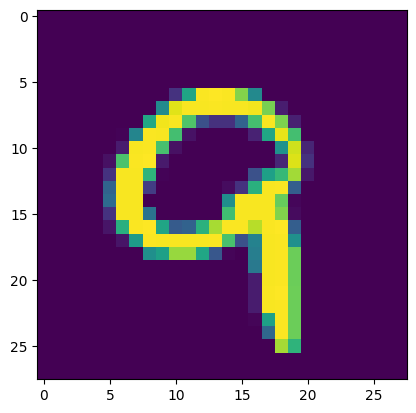

In [11]:
plt.imshow(X_train[10])
plt.show

print(y_train[10])

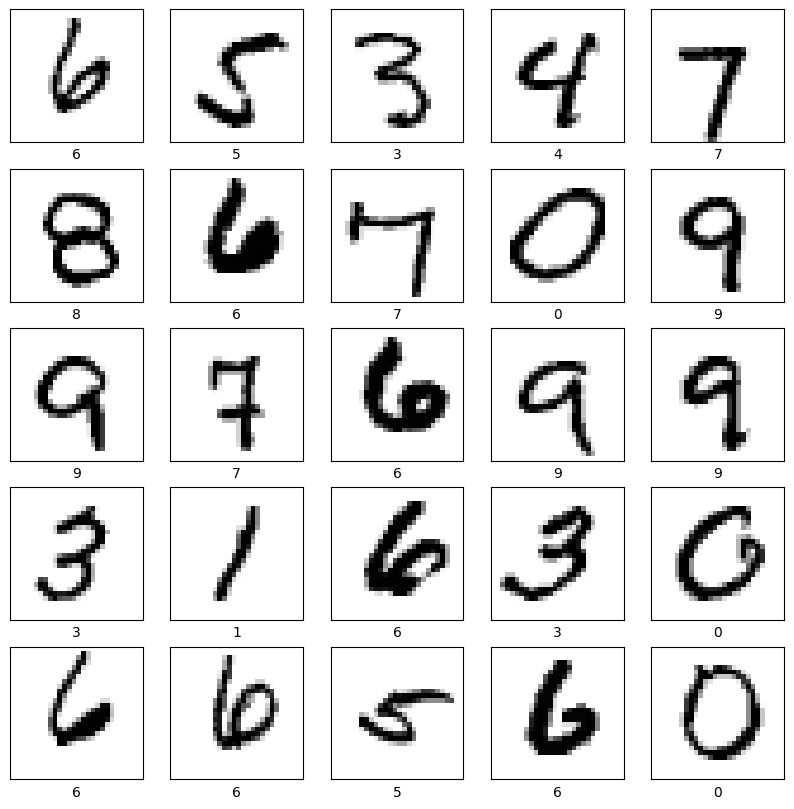

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Building the Neural Network

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation = 'softmax')
])

In [14]:
#Compiling

model.compile(optimizer='Adam', loss= 'SparseCategoricalCrossentropy', metrics=['accuracy'])

In [15]:
#Fitting the model

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 6s 4ms/step - loss: 0.3099 - accuracy: 0.9090
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1298 - accuracy: 0.9605
Epoch 3/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0898 - accuracy: 0.9727
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0648 - accuracy: 0.9804
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0527 - accuracy: 0.9830
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0401 - accuracy: 0.9868
Epoch 7/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0327 - accuracy: 0.9887
Epoch 8/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0278 - accuracy: 0.9911
Epoch 9/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0234 - accuracy: 0.9923
Epoch 10/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.018

Training Data Accuracy= 97.39

In [16]:
#Accuracy on test data

loss, accuracy= model.evaluate(X_test, y_test)

263/263 [==============================] - 1s 3ms/step - loss: 0.1190 - accuracy: 0.9725


Test data accuracy= 95.69


6


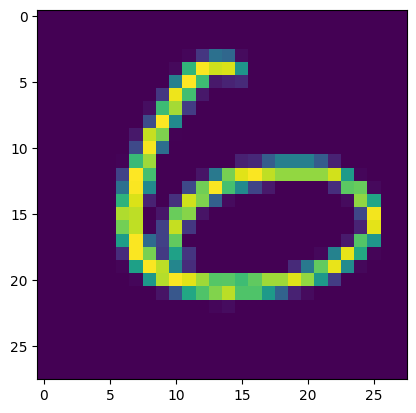

In [17]:
plt.imshow(X_test[10])
plt.show

print(y_test[10])

In [18]:
y_pred=model.predict(X_test)

print(y_pred[0])

263/263 [==============================] - 1s 3ms/step
[4.4494840e-08 3.0600024e-08 1.1477340e-06 5.3913391e-07 4.5508687e-11
 1.3479270e-13 8.5685675e-10 3.1986307e-09 9.9999815e-01 5.4406182e-09]


Model gives probability of each class for that data point


In [19]:
y_pred_labels= [np.argmax(i) for i in y_pred]
print(y_pred_labels)

print(y_test)

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4, 9, 5, 2, 6, 0, 0, 0, 8, 6, 3, 6, 6, 1, 9, 8, 6, 7, 3, 6, 1, 9, 7, 9, 6, 8, 3, 4, 2, 7, 8, 4, 3, 3, 7, 1, 2, 6, 2, 9, 6, 4, 0, 4, 8, 5, 5, 4, 3, 9, 3, 9, 4, 2, 8, 1, 6, 3, 7, 0, 3, 1, 7, 6, 7, 6, 1, 9, 5, 3, 6, 9, 3, 7, 6, 6, 5, 2, 9, 5, 5, 4, 6, 0, 4, 1, 1, 1, 6, 8, 9, 1, 1, 4, 7, 1, 0, 3, 6, 9, 8, 1, 3, 7, 3, 9, 6, 5, 7, 1, 0, 6, 5, 6, 4, 2, 0, 9, 9, 9, 4, 2, 3, 6, 4, 0, 9, 9, 1, 7, 7, 1, 6, 8, 1, 7, 6, 6, 5, 7, 9, 9, 0, 7, 9, 9, 1, 3, 6, 5, 8, 7, 1, 6, 7, 0, 9, 3, 0, 8, 6, 0, 1, 9, 9, 2, 3, 7, 2, 6, 6, 6, 8, 9, 6, 0, 7, 4, 5, 5, 6, 3, 1, 5, 3, 7, 9, 9, 0, 7, 4, 7, 5, 1, 1, 0, 2, 5, 3, 8, 1, 3, 9, 3, 6, 7, 3, 1, 3, 4, 4, 0, 2, 7, 1, 4, 2, 1, 0, 5, 3, 9, 8, 7, 6, 5, 1, 0, 5, 7, 9, 7, 1, 7, 7, 4, 2, 2, 3, 4, 5, 2, 6, 4, 1, 8, 8, 5, 5, 5, 4, 9, 6, 6, 6, 1, 0, 6, 3, 1, 9, 9, 0, 8, 3, 9, 7, 7, 2, 3, 1, 8, 2, 6, 1, 5, 1, 0, 0, 5, 3, 5, 6, 9, 6, 7, 1, 1, 3, 7, 3, 2, 5, 1, 8, 3, 1, 0, 1, 2, 9, 7, 2, 7, 8, 2, 7, 0, 3, 9, 4, 0, 1, 6, 

In [20]:
df_test=df_test/255.0

df_test=df_test.values

print(type(df_test))
df_test.shape


<class 'numpy.ndarray'>


(28000, 784)

In [21]:
df_test=df_test.reshape(28000, 28, 28, 1)
print(df_test)


[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [22]:

df_test_pred=model.predict(df_test)
print(df_test_pred[0])

875/875 [==============================] - 2s 2ms/step
[1.9155988e-11 1.7143530e-15 9.9999994e-01 4.9640166e-14 1.0394799e-12
 1.7634868e-19 7.4825388e-17 5.1422235e-11 8.8071076e-13 6.7031676e-15]


In [23]:
df_test_pred_labels= [np.argmax(i) for i in df_test_pred]
print(df_test_pred_labels)

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 5, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 3, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 3, 2, 1, 6, 3, 4, 2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 6, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 5, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 8, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 3, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 

In [24]:
answer = pd.DataFrame([np.argmax(i) for i in df_test_pred], columns=['Label'])
answer = answer.reset_index().rename(columns={'index': "ImageId"})
answer['ImageId'] = answer['ImageId'] + 1

In [25]:
answer

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [26]:
answer.to_csv('submission.csv', index=False)